In [1]:
import sys
sys.path.append("../scripts/")
from mcl import *

In [3]:
class ResetMcl(Mcl):
    def __init__(self, envmap, init_pose, num, motion_noise_stds={"nn":0.19, "no":0.01, "on":0.13, "oo":0.2},
                distance_dev_rate=0.14, direction_dev=0.05):
        super().__init__(envmap, init_pose, num, motion_noise_stds, distance_dev_rate, direction_dev)
        self.alphas = {}
        
    def observation_update(self, observation):
        for p in self.particles:
            p.observation_update(observation, self.map, self.distance_dev_rate, self.direction_dev)
        
        alpha = sum([p.weight for p in self.particles])
        obsnum = len(observation)
        if not obsnum in self.alphas:
            self.alphas[obsnum] = []
        self.alphas[obsnum].append(alpha)
        
        self.set_ml()
        self.resampling()

<IPython.core.display.Javascript object>


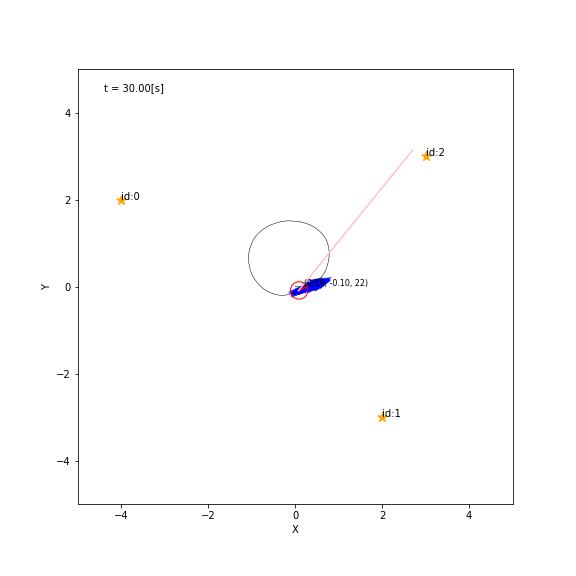

In [10]:
if __name__ == "__main__":
    time_interval = 0.1
    world = World(30, time_interval, debug=False)

    m = Map()
    for ln in [(-4, 2), (2, -3), (3, 3)]:
        m.append_landmark(Landmark(*ln))
    world.append(m)

    initial_pose = np.array([0, 0, 0]).T
    pf = ResetMcl(m, initial_pose, 100)
    agent = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(initial_pose, sensor=Camera(m), agent=agent, color="red")
    world.append(r)

    world.draw()

In [11]:
for num in pf.alphas:
    print("landmarks: ", num, "particles: ", len(pf.particles), "min: ", min(pf.alphas[num]), "max: ", max(pf.alphas[num]))

landmarks:  2 particles:  100 min:  2.036426762214362 max:  18.826133585780646
landmarks:  1 particles:  100 min:  0.5210107094821016 max:  5.24217400781304
landmarks:  0 particles:  100 min:  1.0000000000000007 max:  1.0000000000000007
